# **Student:** EZEKIEL GABRIEL NWIBO  
# **Student ID:** 2424317  
# **Course:** MSc Artificial Intelligence  
# **Module:** AIN7301 - Applied Artificial Intelligence  
# **Tool:** Jupyter Notebook  
# **Dataset:** Simulated Loan Applications  


# IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING OF THE DATASET

In [4]:
# Windows-style path
file_path = r'C:\Users\Emma\Desktop\Loan Approval Prediction.csv'

df = pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# DISPLAYING THE DATASET DESCRIPTION

In [5]:
# Dataset shape
print("Dataset Dimensions:", df.shape)

# Column types and null counts
print("\nColumn Information:")
df.info()  # Do NOT use print() here

# Missing value count
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Preview of dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Summary statistics for numerical features
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")


Dataset Dimensions: (367, 12)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB

Missing Values by Column:
Loan_ID               0
Gender               11
Married               0
Dependents

# DATA PROCESSING

In [6]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Emma\Desktop\Loan Approval Prediction.csv')

# 1. Feature Engineering: Create Loan_Status
df['Loan_Status'] = df.apply(
    lambda row: 1 if (row['Credit_History'] == 1.0 and row['ApplicantIncome'] > 3000) else 0,
    axis=1
)

# 2. Drop non-informative ID column
df.drop(columns=['Loan_ID'], inplace=True, errors='ignore')

# 3. Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 4. Handle missing values
# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Impute categorical columns with most frequent value, if any exist
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# 5. Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 6. Define features and target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# 7. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 8. Summary of result
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Number of features:", X_train.shape[1])


Training set size: (293, 11)
Testing set size: (74, 11)
Number of features: 11


# Visualisations

# 1. Correlation Matrix

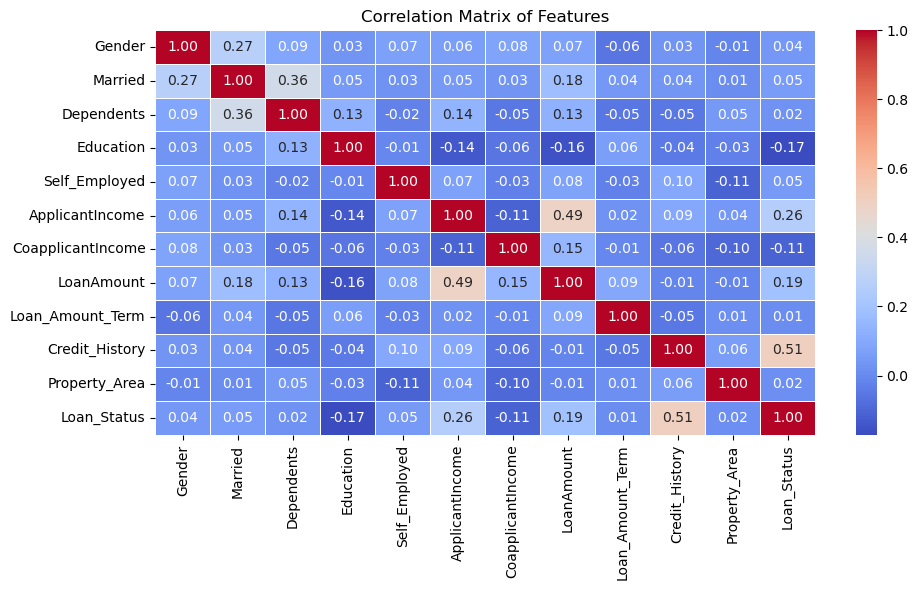

In [7]:
df_corr = df.copy()

# Convert categorical columns only for correlation plotting
cat_cols = df_corr.select_dtypes(include='object').columns

for col in cat_cols:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

# 2. Boxplot: LoanAmount vs Loan_Status

C:\Users\Emma\AppData\Local\Temp\ipykernel_28824\3186275472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set2')


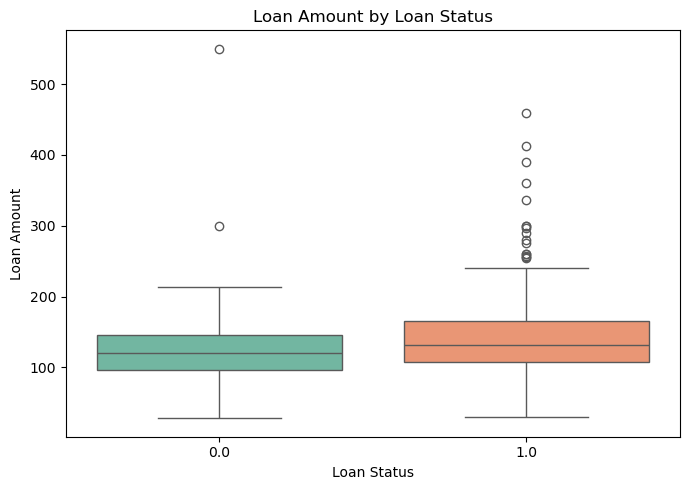

In [8]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set2')
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()

# ducation VS Loan Status

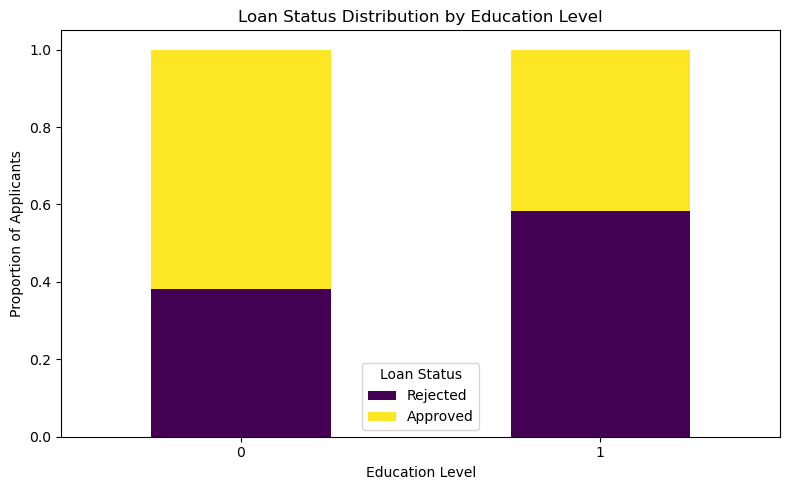

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare proportion data
edu_vs_status = pd.crosstab(df['Education'], df['Loan_Status'], normalize='index')

# Plot as stacked percentage bars
edu_vs_status.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Loan Status Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of Applicants")
plt.legend(title="Loan Status", labels=["Rejected", "Approved"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

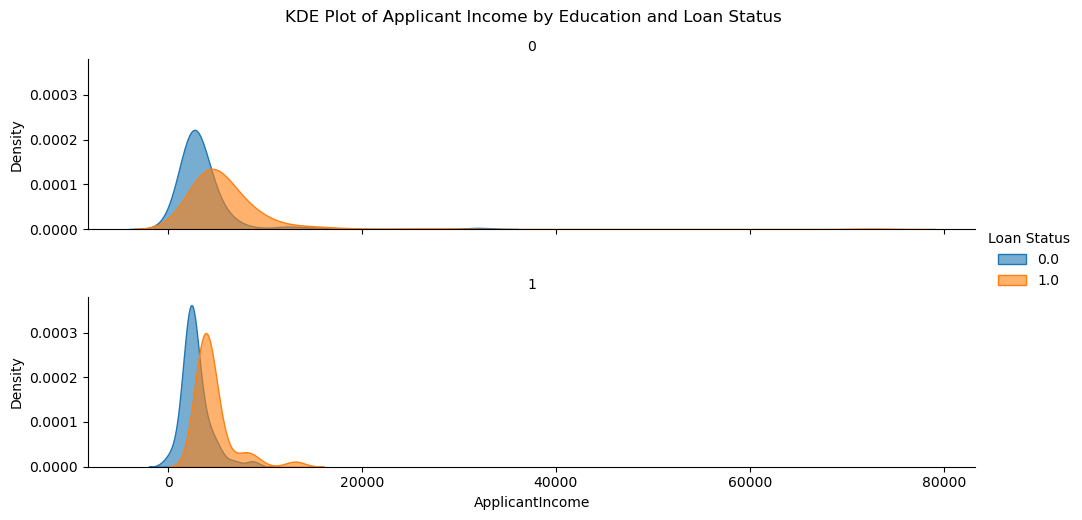

In [26]:
g = sns.FacetGrid(df, row='Education', hue='Loan_Status', aspect=4, height=2.5)
g.map(sns.kdeplot, 'ApplicantIncome', fill=True, alpha=0.6)
g.add_legend(title="Loan Status")
g.set_titles(row_template="{row_name}")
g.fig.subplots_adjust(hspace=0.4)
plt.suptitle("KDE Plot of Applicant Income by Education and Loan Status", y=1.03)
plt.show()

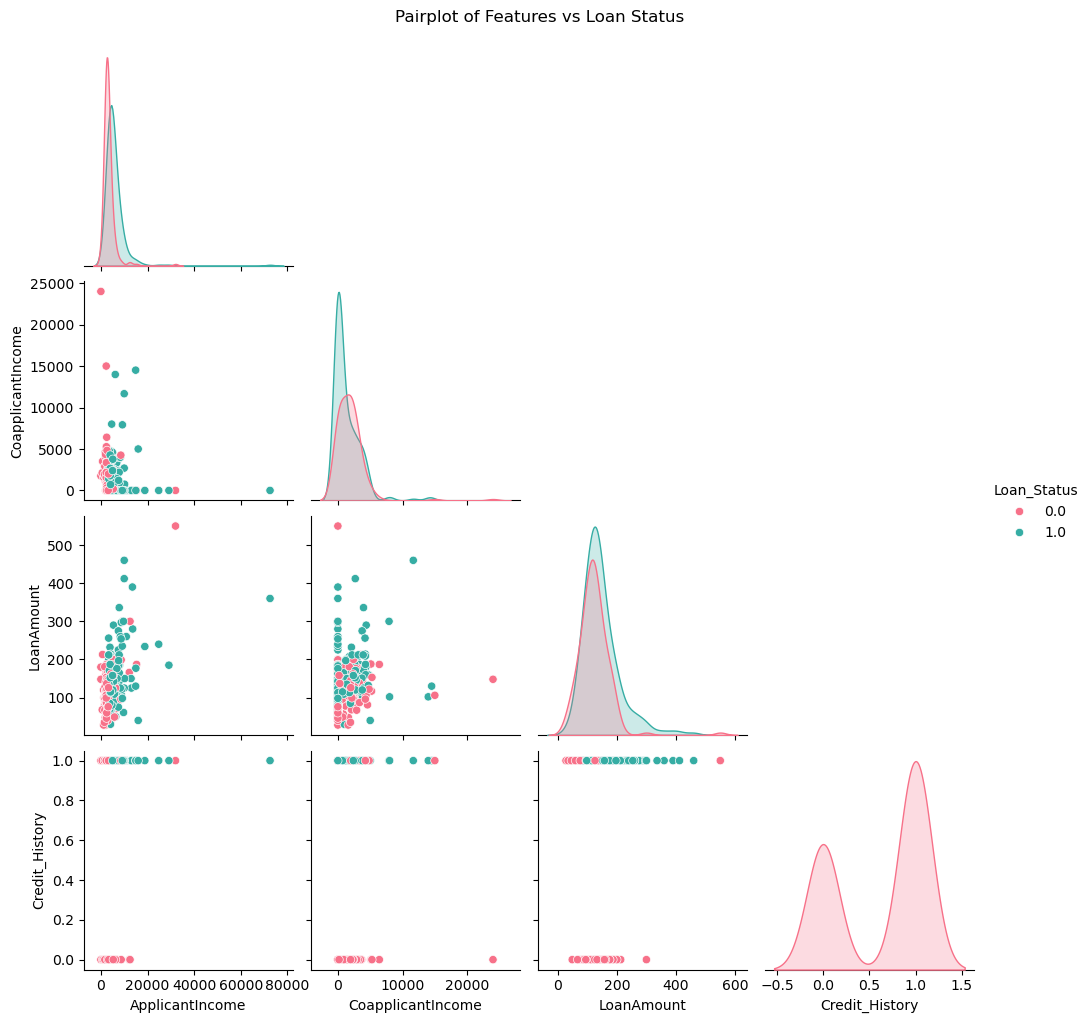

In [10]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status']],
             hue='Loan_Status', palette='husl', corner=True)
plt.suptitle("Pairplot of Features vs Loan Status", y=1.02)
plt.show()

# MODEL SELECTION AND TRAINING

# Logistisc Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred_log = log_model.predict(X_test_scaled)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

# Step 5: Print results
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1 Score: {f1:.4f}")

- Accuracy: 0.8784
- Precision: 0.8095
- Recall: 0.9714
- F1 Score: 0.8831


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree:
Accuracy: 0.9324324324324325
Precision: 0.9411764705882353
Recall: 0.9142857142857143
F1 Score: 0.927536231884058


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.972972972972973
Precision: 0.9459459459459459
Recall: 1.0
F1 Score: 0.9722222222222222


# -Nearest Neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.7567567567567568
Precision: 0.6976744186046512
Recall: 0.8571428571428571
F1 Score: 0.7692307692307693


# X Gboost

In [15]:
from xgboost import XGBClassifier

# No need for use_label_encoder
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost:
Accuracy: 0.9594594594594594
Precision: 0.9444444444444444
Recall: 0.9714285714285714
F1 Score: 0.9577464788732394


# MODEL RESULTS

In [16]:
# Dictionary of model predictions
model_preds = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "K-Nearest Neighbors": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Collect results
metrics = []
for model_name, y_pred in model_preds.items():
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(metrics).sort_values(by="F1 Score", ascending=False)

# Display
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.972973   0.945946  1.000000  0.972222
4              XGBoost  0.959459   0.944444  0.971429  0.957746
1        Decision Tree  0.932432   0.941176  0.914286  0.927536
0  Logistic Regression  0.878378   0.809524  0.971429  0.883117
3  K-Nearest Neighbors  0.756757   0.697674  0.857143  0.769231


# CONFUSION MATRIX

In [17]:
def plot_confusion_matrices_for_all_models(y_test, predictions_dict):
    """
    Plots advanced, color-graded confusion matrices for each model in a dictionary.
    Parameters:
        y_test (array): True labels
        predictions_dict (dict): Dictionary of model name -> predicted labels
    """
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    for model_name, y_pred in predictions_dict.items():
        cm = confusion_matrix(y_test, y_pred)
        cm_percent = cm / np.sum(cm) * 100

        # Annotate matrix with count and %
        annot = np.empty_like(cm).astype(str)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                count = cm[i, j]
                percent = cm_percent[i, j]
                annot[i, j] = f"{count}\n({percent:.1f}%)"

        # Plot
        plt.figure(figsize=(7, 6))
        sns.set(style='whitegrid')
        sns.heatmap(cm, annot=annot, fmt='', cmap='flare',
                    xticklabels=['Rejected', 'Approved'],
                    yticklabels=['Rejected', 'Approved'],
                    linewidths=1.5, linecolor='white',
                    cbar=True, square=True,
                    annot_kws={"fontsize": 12, "fontweight": 'bold'})

        plt.title(f"{model_name} – Confusion Matrix", fontsize=14, fontweight='bold', pad=15)
        plt.xlabel("Predicted Label", fontsize=12)
        plt.ylabel("True Label", fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.tight_layout()
        plt.show()

# Visualisation

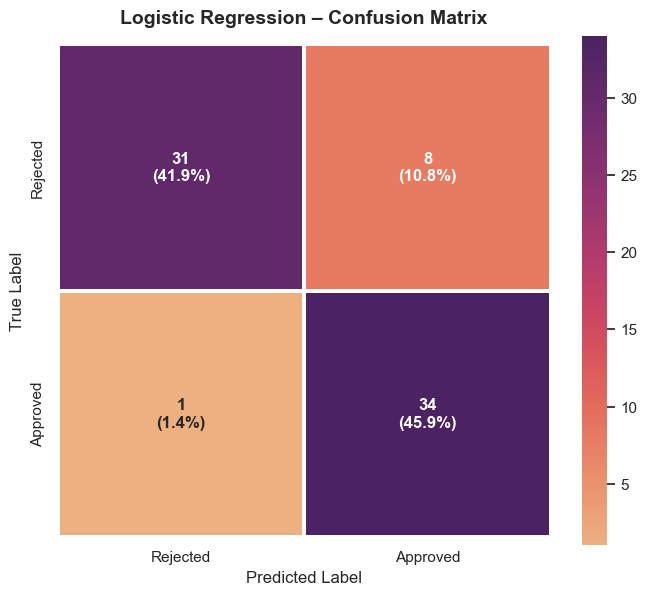

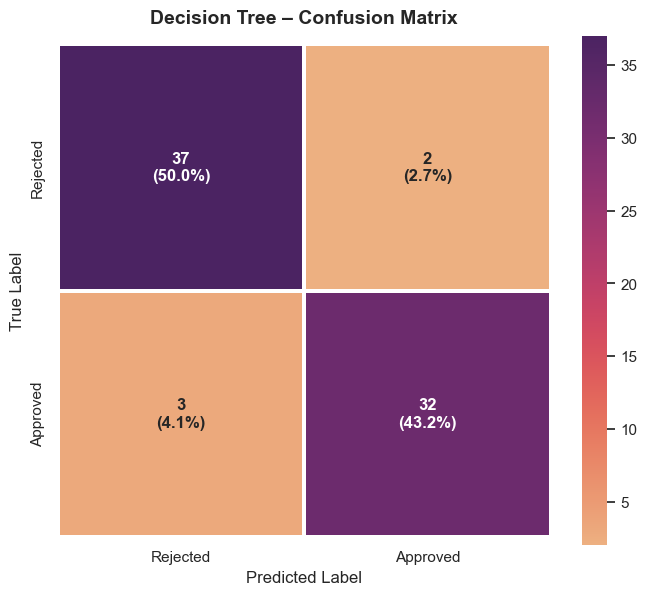

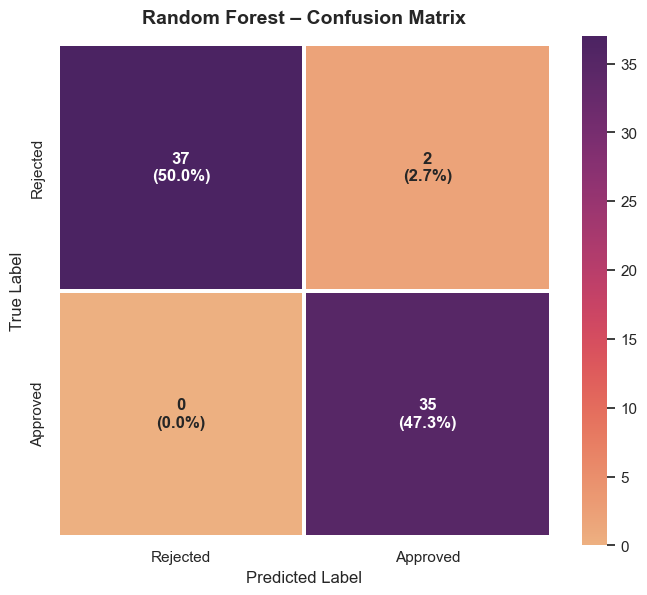

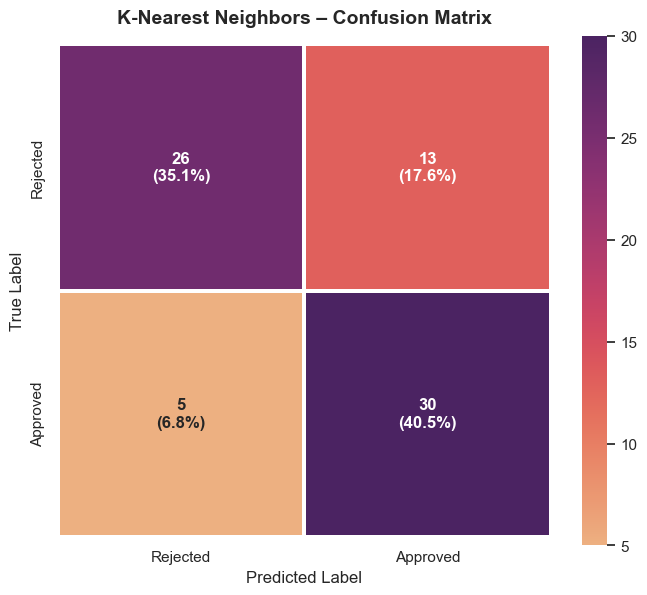

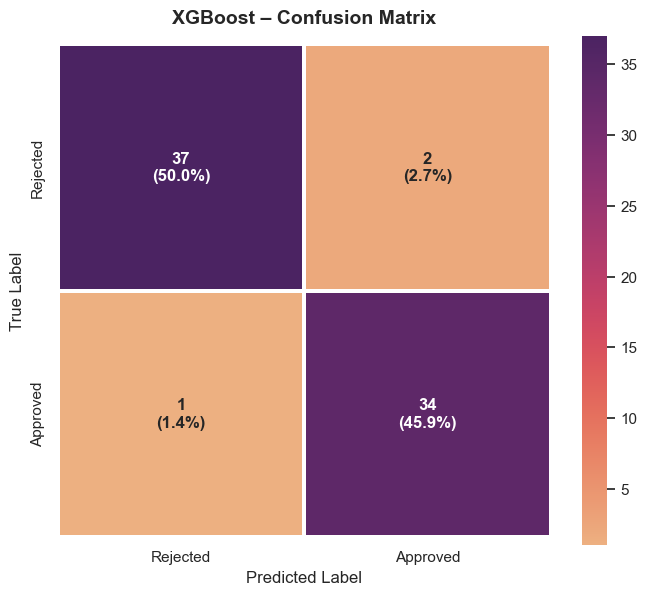

In [18]:
predictions_dict = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "K-Nearest Neighbors": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Call the function
plot_confusion_matrices_for_all_models(y_test, predictions_dict)

# ROC Curve Analysis and Final Model Comparison

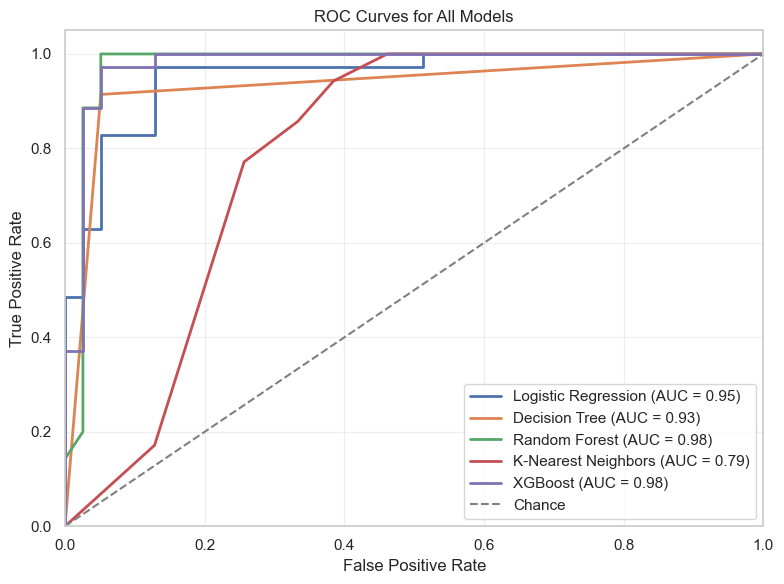

In [19]:
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Predict probabilities for ROC ===
model_probabilities = {
    "Logistic Regression": log_model.predict_proba(X_test_scaled)[:, 1],  # scaled
    "Decision Tree": tree_model.predict_proba(X_test)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "K-Nearest Neighbors": knn_model.predict_proba(X_test)[:, 1],
    "XGBoost": xgb_model.predict_proba(X_test)[:, 1]
}

# === Build ROC Curve Data ===
roc_data = {}
for name, y_proba in model_probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# === Plot ROC Curves ===
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# F1 Score Comparison Bar Chart

In [23]:
from sklearn.metrics import f1_score

# Rebuild the score_df from your model predictions
score_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost'],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_xgb)
    ]
})

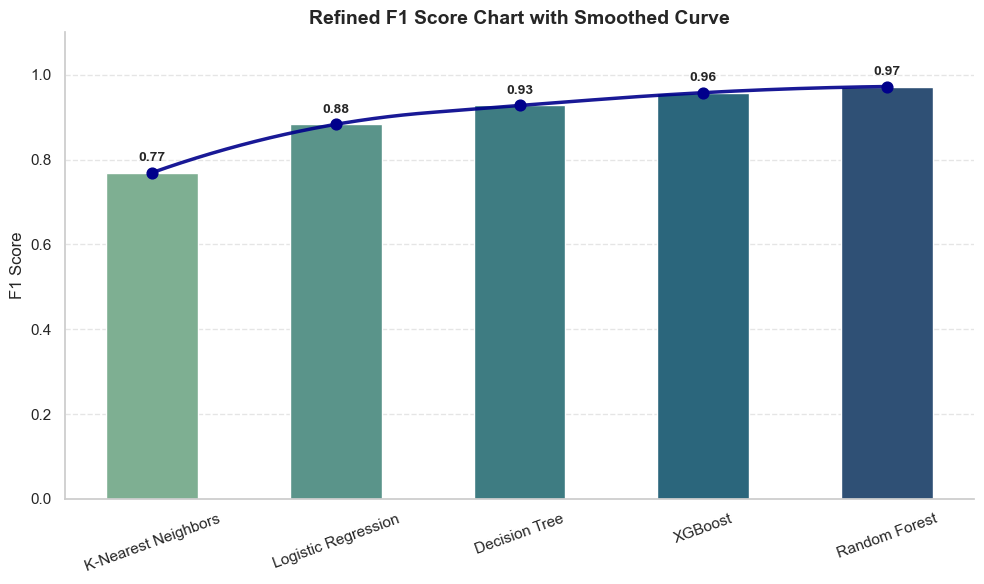

In [26]:
import scipy.interpolate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort data
score_df_sorted = score_df.sort_values(by='F1 Score').reset_index(drop=True)
x_vals = np.arange(len(score_df_sorted))
y_vals = score_df_sorted['F1 Score'].values

# Plot with hue and dodge
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=score_df_sorted, x='Model', y='F1 Score',
                  palette='crest', hue='Model', dodge=False, width=0.5)

# Remove legend safely
if bar.legend_:
    bar.legend_.remove()

# Annotate bars
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f"{height:.2f}",
                 (p.get_x() + p.get_width() / 2., height + 0.02),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Curve + markers
x_points = [p.get_x() + p.get_width() / 2. for p in bar.patches]
y_points = y_vals
spline = scipy.interpolate.make_interp_spline(x_points, y_points, k=2)
x_smooth = np.linspace(min(x_points), max(x_points), 300)
y_smooth = spline(x_smooth)
plt.plot(x_smooth, y_smooth, color='darkblue', linewidth=2.5, linestyle='-', alpha=0.9)
plt.scatter(x_points, y_points, color='darkblue', s=60, zorder=3)

# Final formatting
plt.title("Refined F1 Score Chart with Smoothed Curve", fontsize=14, fontweight='bold')
plt.ylabel("F1 Score", fontsize=12)
plt.xlabel("")
plt.ylim(0, 1.1)
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

# Random Forest Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("\nBest F1 Score:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters:
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}

Best F1 Score: 0.9515


In [78]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
# Evaluate tuned model
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

# Print results
print("Tuned Random Forest")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1 Score: {f1:.4f}")

Tuned Random Forest
- Accuracy: 0.9730
- Precision: 0.9459
- Recall: 1.0000
- F1 Score: 0.9722


# Confusion Matix of the Confusion Matrix

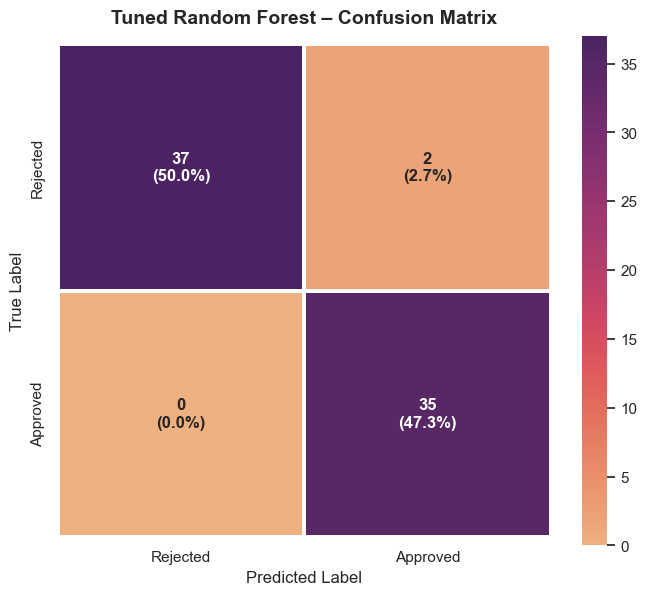

In [31]:
# Predict using the best model from GridSearchCV
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)
def plot_advanced_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm / np.sum(cm) * 100
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = cm_percent[i, j]
            annot[i, j] = f"{count}\n({percent:.1f}%)"
    labels = ['Rejected', 'Approved']
    plt.figure(figsize=(7, 6))
    sns.set(style='whitegrid')
    sns.heatmap(cm, annot=annot, fmt='', cmap='flare',
                xticklabels=labels, yticklabels=labels,
                linewidths=1.5, linecolor='white',
                cbar=True, square=True,
                annot_kws={"fontsize": 12, "fontweight": 'bold'})
    plt.title(f"{model_name} – Confusion Matrix", fontsize=14, fontweight='bold', pad=15)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

plot_advanced_confusion_matrix(y_test, y_pred_best_rf, model_name="Tuned Random Forest")